<a href="https://colab.research.google.com/github/genadidharma/pengolahan-citra-dan-visi-komputer/blob/main/Week%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Tugas Praktikum

1. Gamma Correction

Gamma Correction pada Citra
--------------------------------
Masukan nilai gamma: 10


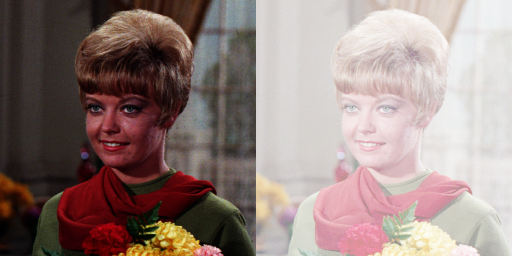

In [3]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Gamma Correction pada Citra')
print('--------------------------------')
try:
  gamma = int(input('Masukan nilai gamma: '))
except:
  print('Error, nilai bungkan angka')

original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 4/Source/female.tiff')

#Add gamma correction formula
invGamma = 1 / gamma
table = [((i / 255) ** invGamma) * 255 for i in range(256)]
table = np.array(table, np.uint8)

#Insert the gamma formula to original image
gamma_image = cv.LUT(original, table)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. Simulasi Image Depth

Image Depth pada Citra
--------------------------------
Masukan nilai depth: 1
255.0


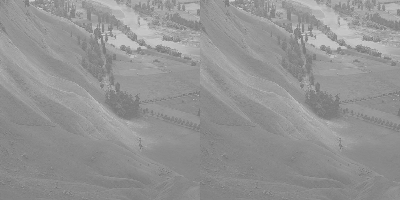

In [4]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Image Depth pada Citra')
print('--------------------------------')
try:
  depth = int(input('Masukan nilai depth: '))
except:
  print('Error, nilai bungkan angka')

original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 4/Source/wiki.jpg')
original = cv.resize(original, (200,200))

#Add gamma correction formula
level = 255 / (2 ** depth - 1)
print(level)

#Accessing pixels
depth_image = np.zeros(original.shape, original.dtype)
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      depth_image[y,x,c] = round((original[y,x,c] / level) * level)

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

3. Module Average Denoising

In [5]:
import glob 

# Load images in glob
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 4/Source/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 4/Source/galaxy.jpg')

# Define PSNR function
def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): 
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print("Hasil nilai PSNR pada citra average 5 adalah %.3f" % (PSNR(original, cv_img[4])))
print("Hasil nilai PSNR pada citra average 30 adalah %.3f" % (PSNR(original, cv_img[29])))
print("Hasil nilai PSNR pada citra average 60 adalah %.3f" % (PSNR(original, cv_img[59])))
print("Hasil nilai PSNR pada citra average 80 adalah %.3f" % (PSNR(original, cv_img[79])))
print("Hasil nilai PSNR pada citra average 100 adalah %.3f" % (PSNR(original, cv_img[99])))

Hasil nilai PSNR pada citra average 5 adalah 27.886
Hasil nilai PSNR pada citra average 30 adalah 27.864
Hasil nilai PSNR pada citra average 60 adalah 27.876
Hasil nilai PSNR pada citra average 80 adalah 27.881
Hasil nilai PSNR pada citra average 100 adalah 27.874


4. Image Masking

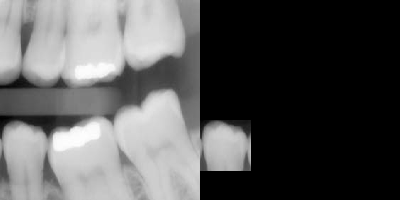

In [12]:
# load image
original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 4/Source/teeth.jpg')
original = cv.resize(original, (200,200))

# create mask base image with the shape of the same image
mask = np.zeros(original.shape[:2], dtype="uint8")
mask_2 = np.zeros(original.shape[:2], dtype="uint8")

# convert mask to square
cv.rectangle(mask, pt1=(0, 120), pt2=(50, 170), color=(255, 255, 255), thickness=-1)

# mask the original image with and operator
masked_image = cv.bitwise_and(original, original, mask=mask)

# show the images
final_frame = cv.hconcat((original, masked_image))
cv2_imshow(final_frame)